In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.spatial.distance import cdist

In [3]:
def var(distances_matrix, p):
    n = distances_matrix.shape[0]
    suma = 0
    for i in range(n-1):
        for j in range(i + 1, n):
            for k in range(n-1):
                for l in range(k + 1, n):
                    suma_interna = 0
                    if i == k or i == l:
                        suma_interna += p*(1-p)-4*p**2*(1-p)
                    if j == k or j == l:
                        suma_interna += p*(1-p)-4*p**2*(1-p)
                    if (i == k and j == l) or (i == l and j == k):
                        suma_interna += 4 * p**2*(1-p**2)    
                    if (i==k and j!=l) or (j==k and i!=l) or (i==l and j!=k) or (j==l and i!=k):
                        suma_interna += 4 * p**3*(1-p)    
                    suma += distances_matrix[i,j] * distances_matrix[k,l] * suma_interna 
    return 4*suma


def mantel_estandarizado(distances_matrix, Y):
    p = Y.sum() / Y.shape[0]
    YY = np.abs(Y[:, np.newaxis] - Y)
    return np.sum(distances_matrix * (YY - 2 * p * (1-p))) / np.sqrt(var(distances_matrix, p))

In [4]:
path = 'https://raw.githubusercontent.com/AlejandroVillazonG/MAT467/main/tareas/T1/anomalies.txt'
data = pd.read_csv(path, sep = '\t')

Subset

In [5]:
data = data.loc[(31<=data['lat']) & (data['lat']<=34) & (-102<=data['lon']) & (data['lon']<=-99)]

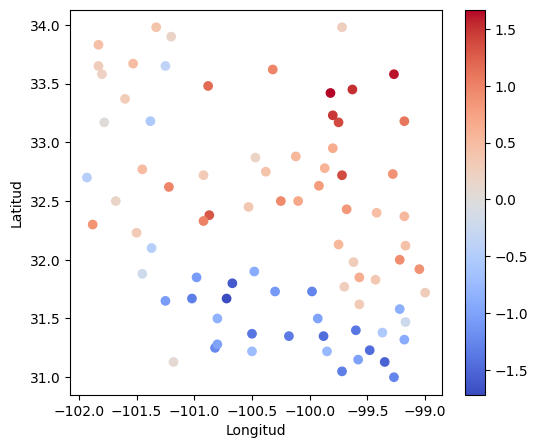

In [6]:
plt.figure(figsize=(6,5))

plt.scatter(data['lon'], data['lat'], c=data['z'], cmap='coolwarm')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.colorbar();

In [7]:
data.describe()

,lon,lat,z
count,82.000000,82.000000,82.000000
mean,-100.313049,32.309756,0.011877
std,0.867125,0.848073,0.924221
min,-101.930000,31.000000,-1.716816
25%,-101.010000,31.627500,-0.887728
50%,-100.150000,32.265000,0.278100
75%,-99.605000,32.877500,0.647450
max,-99.000000,33.980000,1.668522


In [8]:
s = data[['lon', 'lat']].values

In [9]:
distances_matrix = cdist(s,s)

Mantel estandarizado para diferentes valores de $\tau$.

In [12]:
taus = np.linspace(data['z'].min()+1e-1, data['z'].max()-1e-1, 100)
mantels = []

for tau in taus:
    Y = data['z'].apply(lambda x: 1 if x >= tau else 0).values
    mantels.append(mantel_estandarizado(distances_matrix, Y))

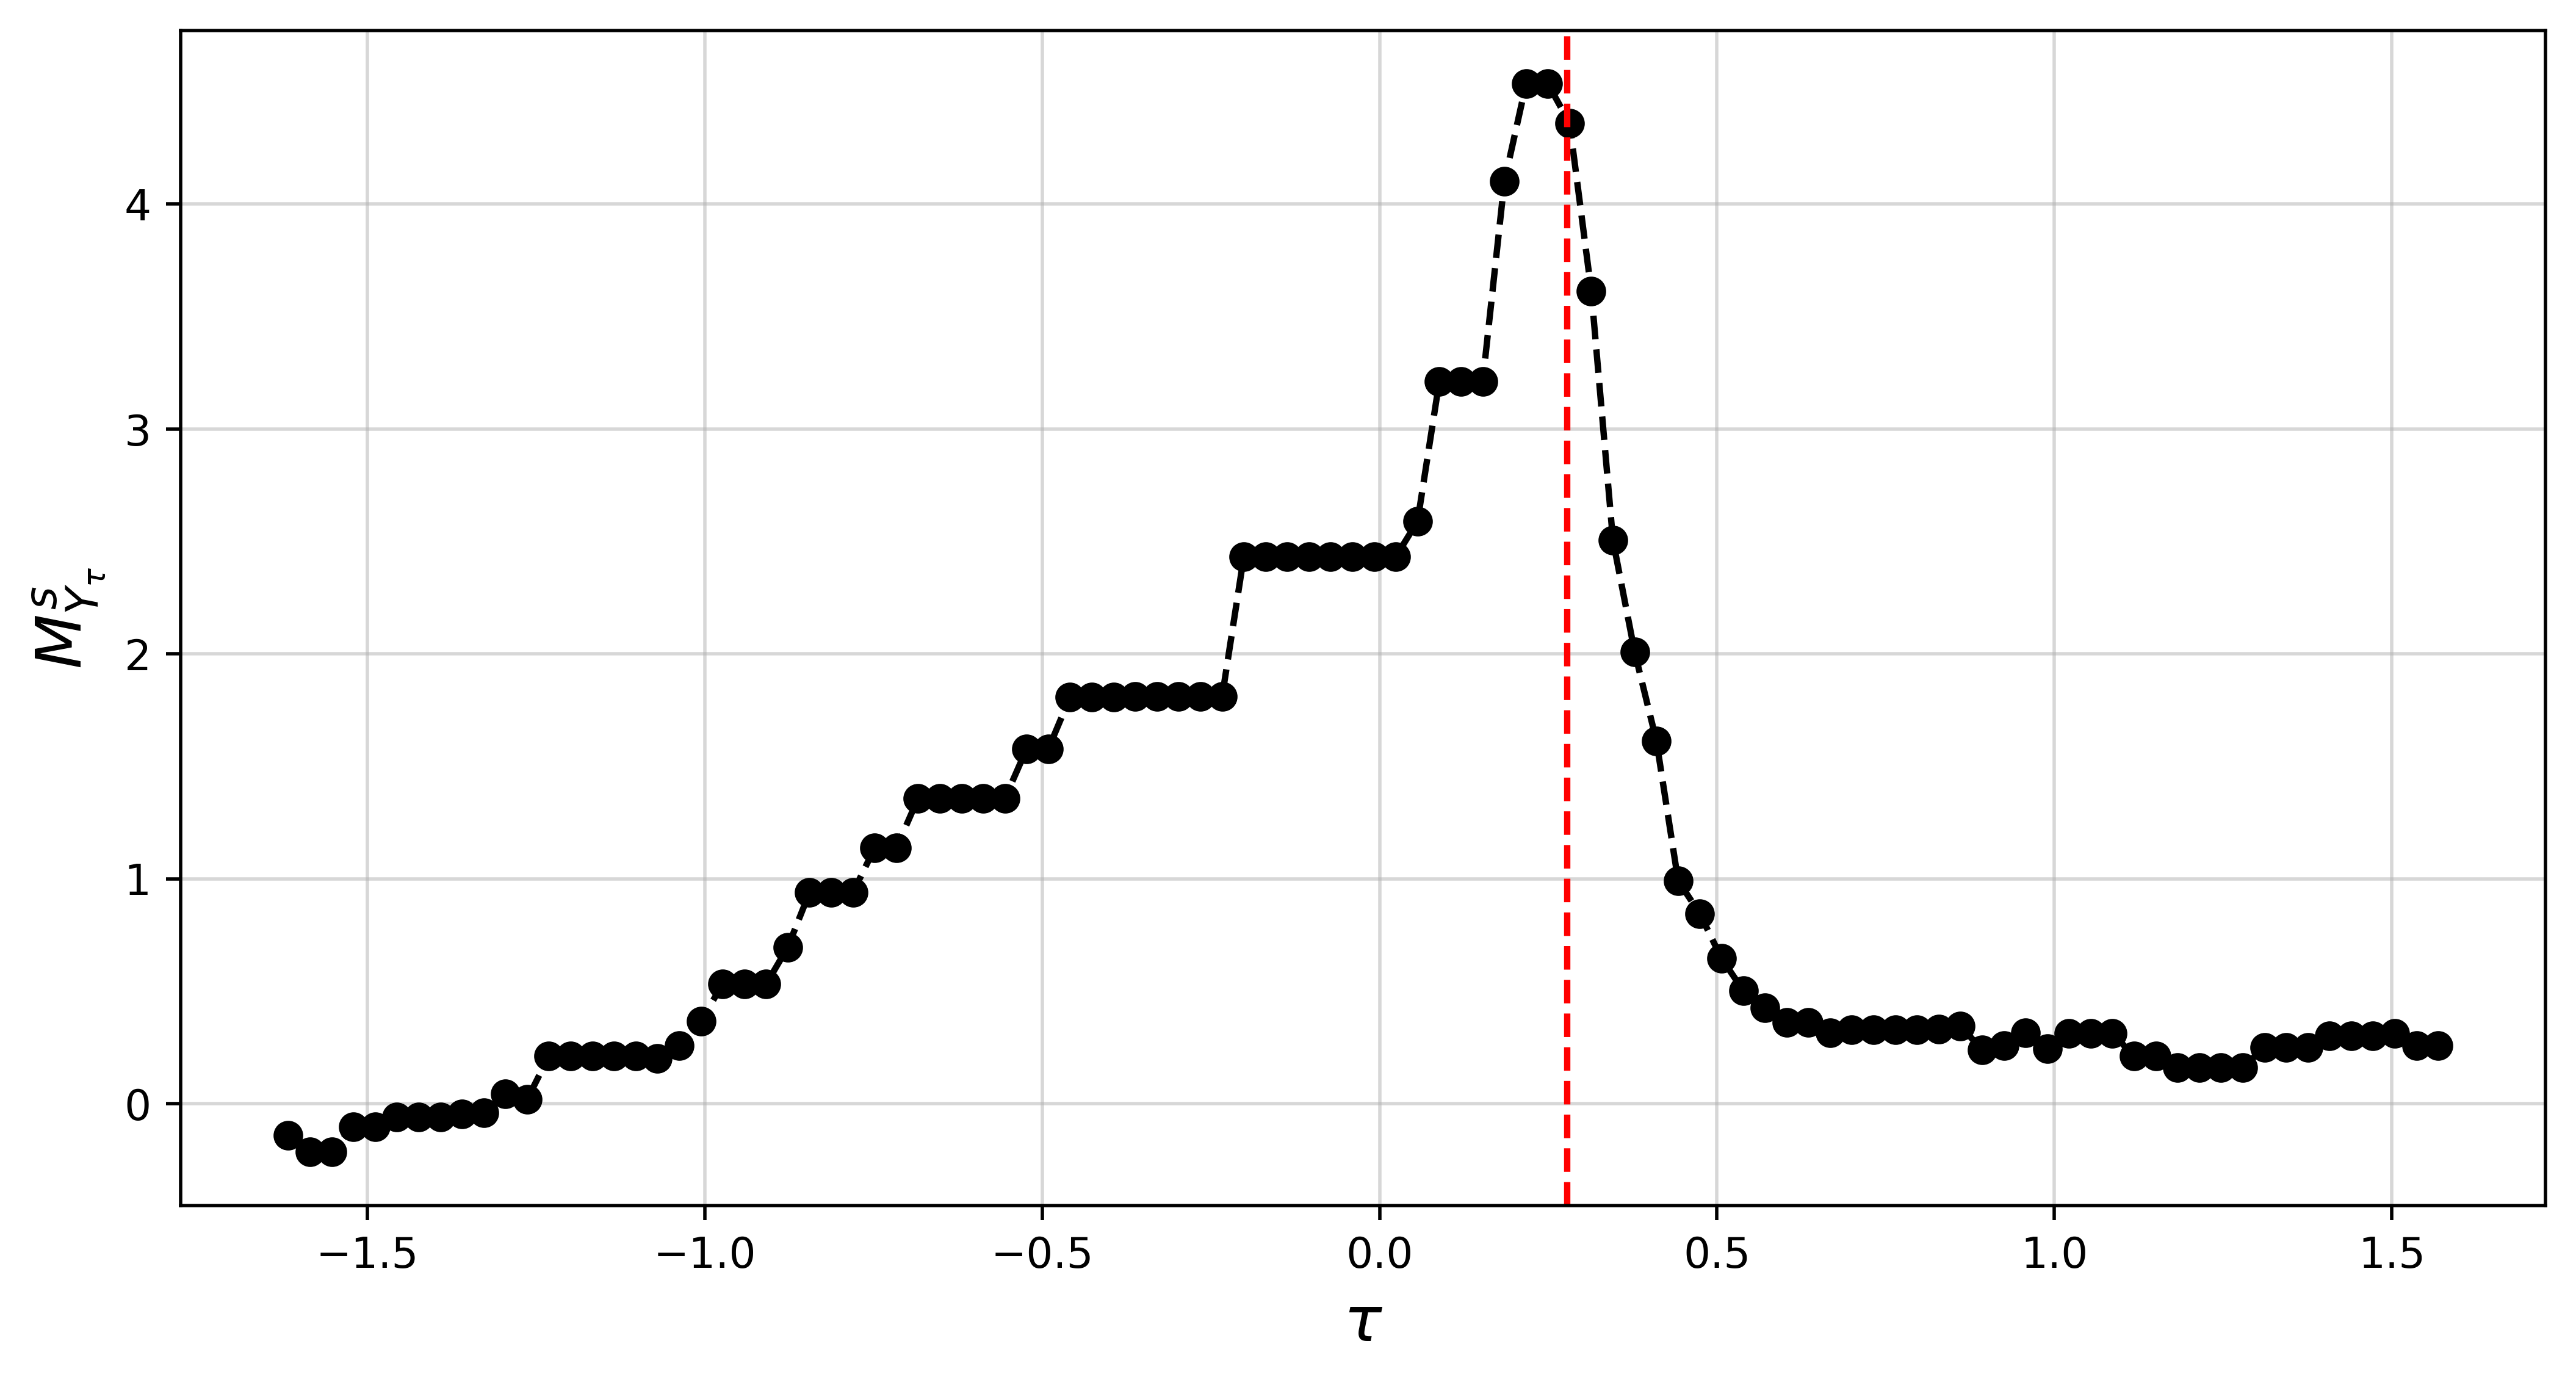

In [91]:
plt.figure(figsize=(10,5), dpi=500)

plt.plot(taus, mantels, 'ko--')
plt.axvline(data['z'].median(), ls='--', c='r')
plt.xlabel(r'$\tau$', size=15)
plt.ylabel(r'$M_{Y_\tau}^s$', size=15)
plt.grid(alpha=0.5);
# plt.title(r'Estadístico de Mantel estandarizado para diferentes valores de $\tau$');

Para $\tau=\operatorname{mediana}(Z)$.

In [92]:
data['z'].median()

0.27810040698063754

In [93]:
tau = data['z'].median()
Y = data['z'].apply(lambda x: 1 if x >= tau else 0).values
mantel_estandarizado(distances_matrix, Y)

5.298679596000693

In [94]:
# \hat(p)
Y.sum() / Y.shape[0]

0.5

Test de hipótesis

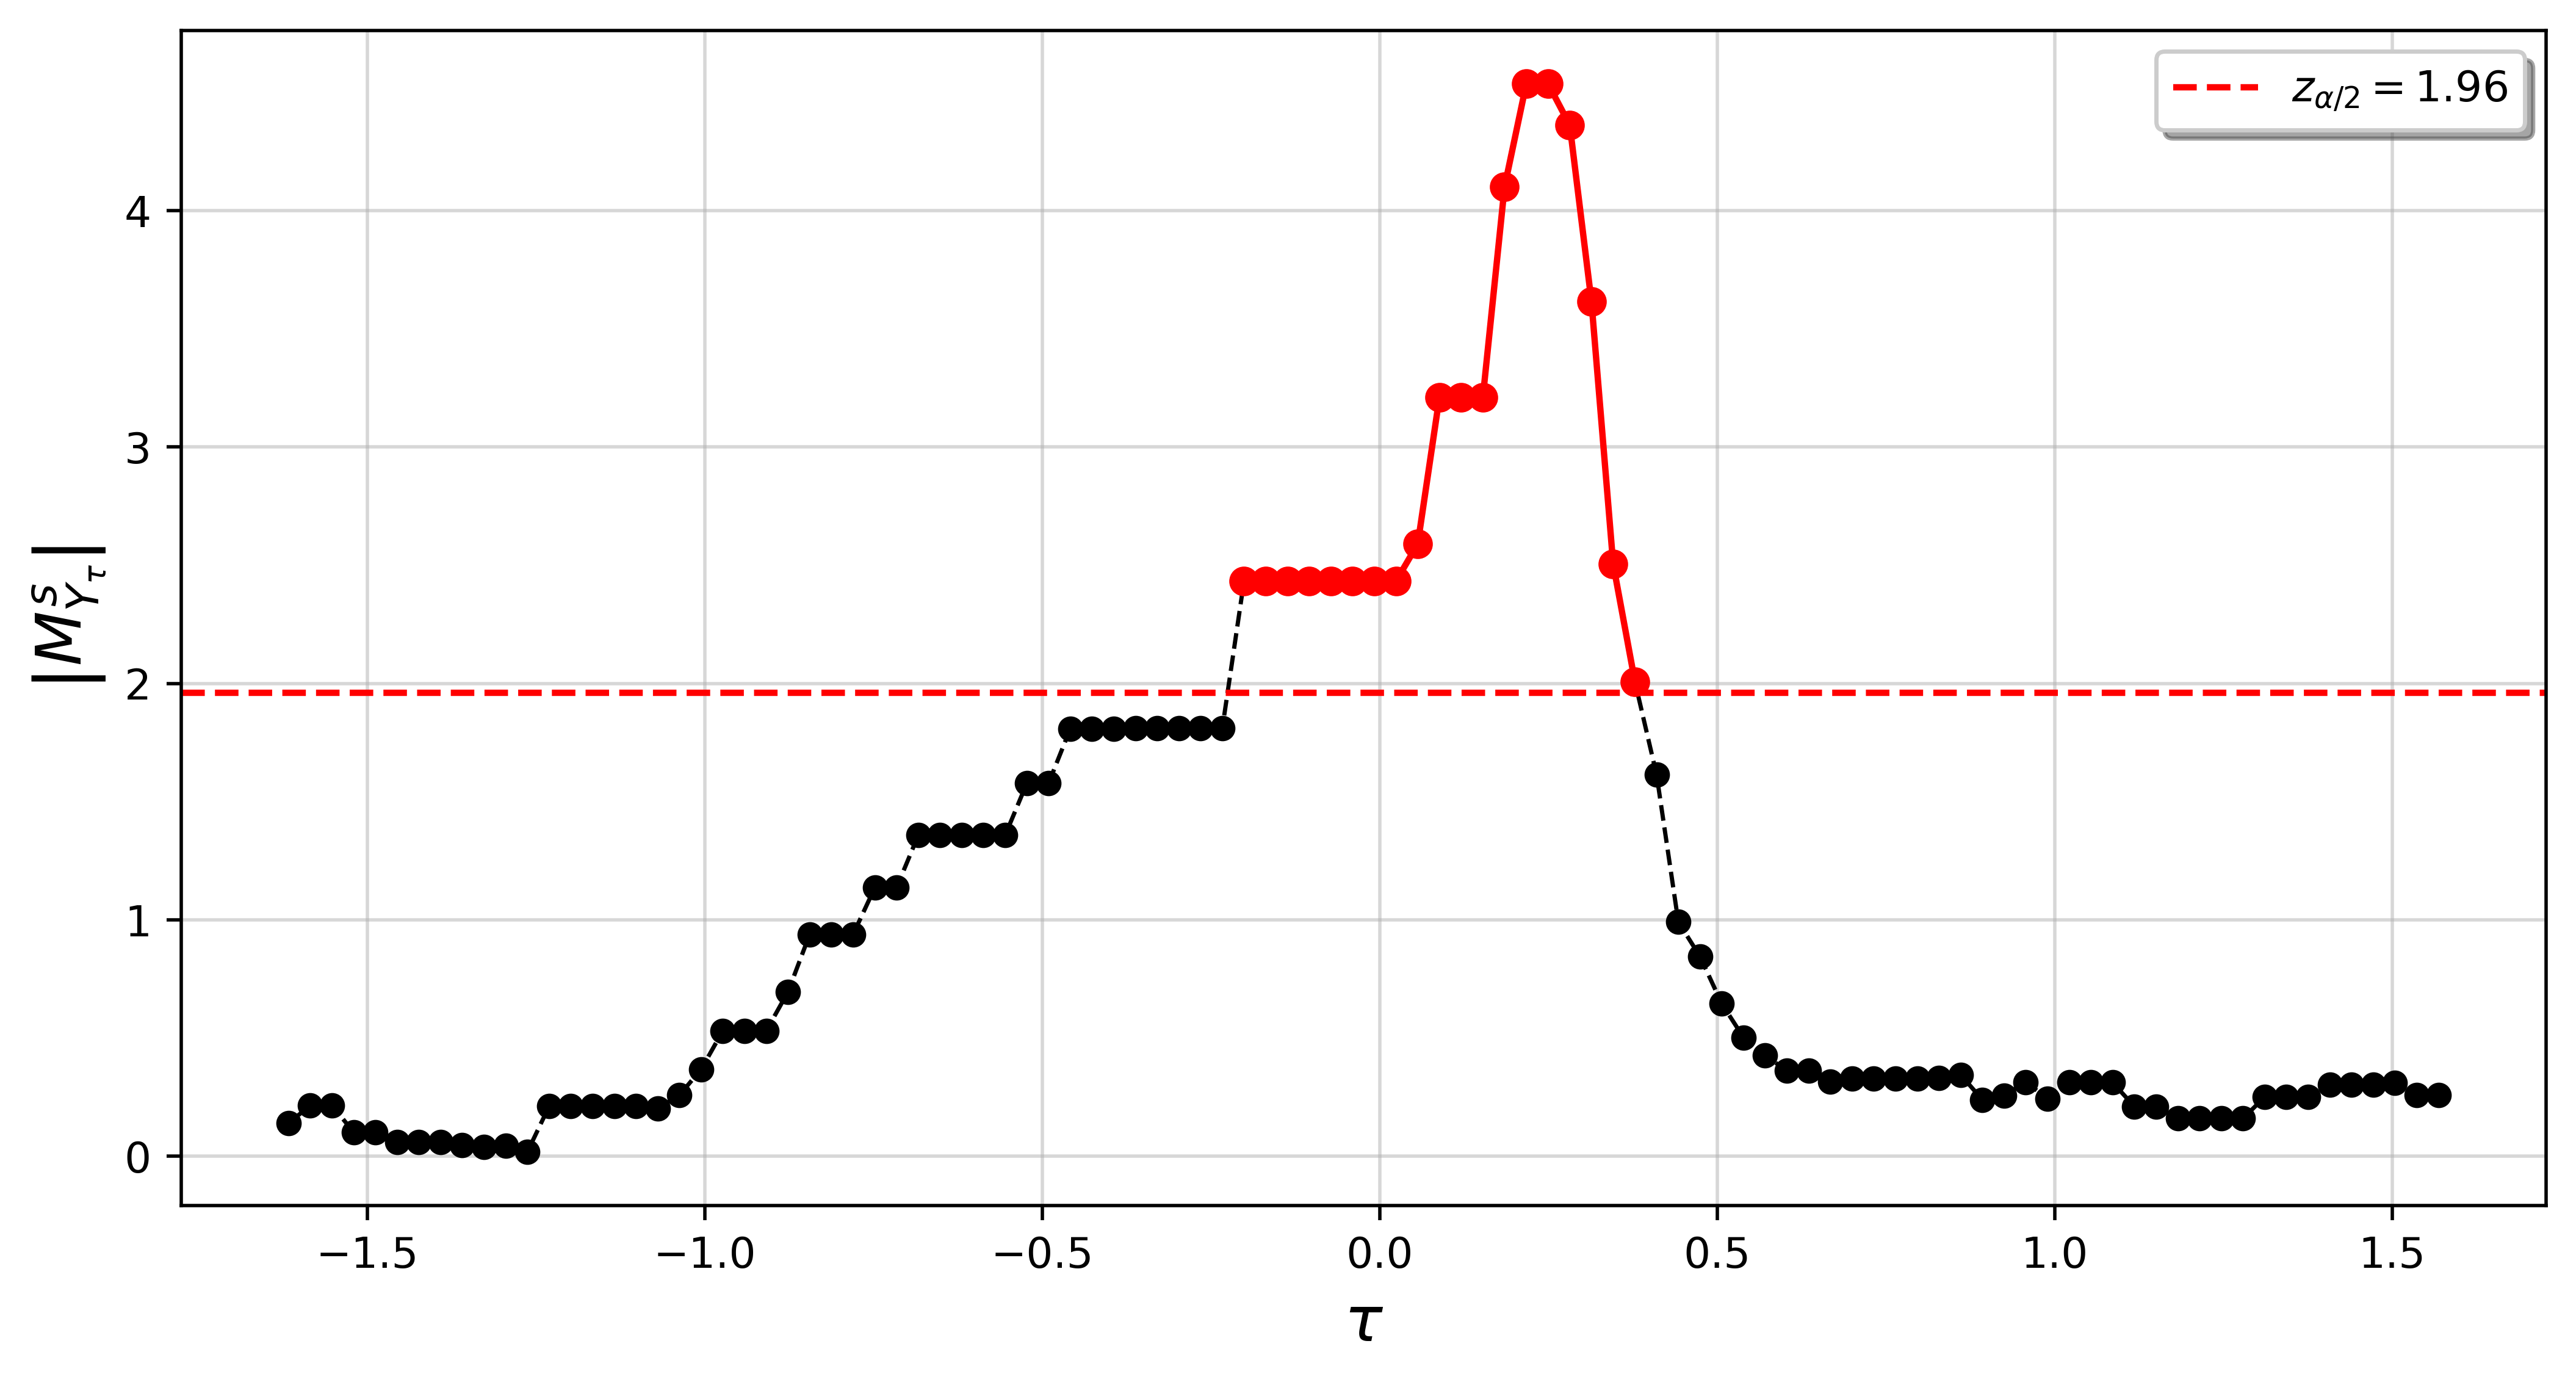

In [74]:
z_alpha_2 = 1.96

plt.figure(figsize=(10,5), dpi=500)

plt.plot(taus, np.abs(mantels), 'ko--', ms=5, lw=1)
plt.plot(taus[np.abs(mantels) > z_alpha_2], np.abs(mantels)[np.abs(mantels) > z_alpha_2], 'ro-')
plt.xlabel(r'$\tau$', size=15)
plt.ylabel(r'$\left|M_{Y_\tau}^s\right|$', size=15)
plt.axhline(z_alpha_2, ls='--', c='r', label=r'$z_{\alpha/2} = 1.96$')
plt.grid(alpha=0.5)
plt.legend(shadow=True);

Región rechazada

In [64]:
taus[np.abs(mantels) > z_alpha_2].min(), taus[np.abs(mantels) > z_alpha_2].max()

(-0.20111045624967905, 0.3780419751405062)

Estadístico de Geary

In [11]:
gearys = np.array([
     0.8497735,0.8409761,0.8409761,0.9319382,0.9319382,0.9633199,0.9633199,0.9633199,0.9722268
,0.9759120,0.9990722,0.9922575,1.0318485,1.0318485,1.0318485,1.0318485,1.0318485,1.0271567
,1.0321927,1.0470279,1.0632586,1.0632586,1.0632586,1.0749161,1.0909881,1.0909881,1.0909881
,1.1045684,1.1045684,1.1179028,1.1179028,1.1179028,1.1179028,1.1179028,1.1183340,1.1183340
,1.1151963,1.1151963,1.1151963,1.1046865,1.1046865,1.1046865,1.1046865,1.1046865,1.1176876
,1.1176876,1.1176876,1.1176876,1.1176876,1.1176876,1.1176876,1.1176876,1.1122206,1.1255065
,1.1255065,1.1255065,1.1064831,1.1016631,1.1016631,1.0836442,1.0785314,1.0828368,1.0842602
,1.0739266,1.0576394,1.0524091,1.0453820,1.0394405,1.0347795,1.0302425,1.0302425,1.0297969
,1.0345441,1.0345441,1.0345441,1.0345441,1.0377511,1.0433372,1.0344228,1.0412815,1.0577376
,1.0503573,1.0742945,1.0742945,1.0742945,1.0512856,1.0512856,1.0404767,1.0404767,1.0404767
,1.0404767,1.0789582,1.0789582,1.0789582,1.1280459,1.1280459,1.1280459,1.1583534,1.1641764
,1.1641764
])

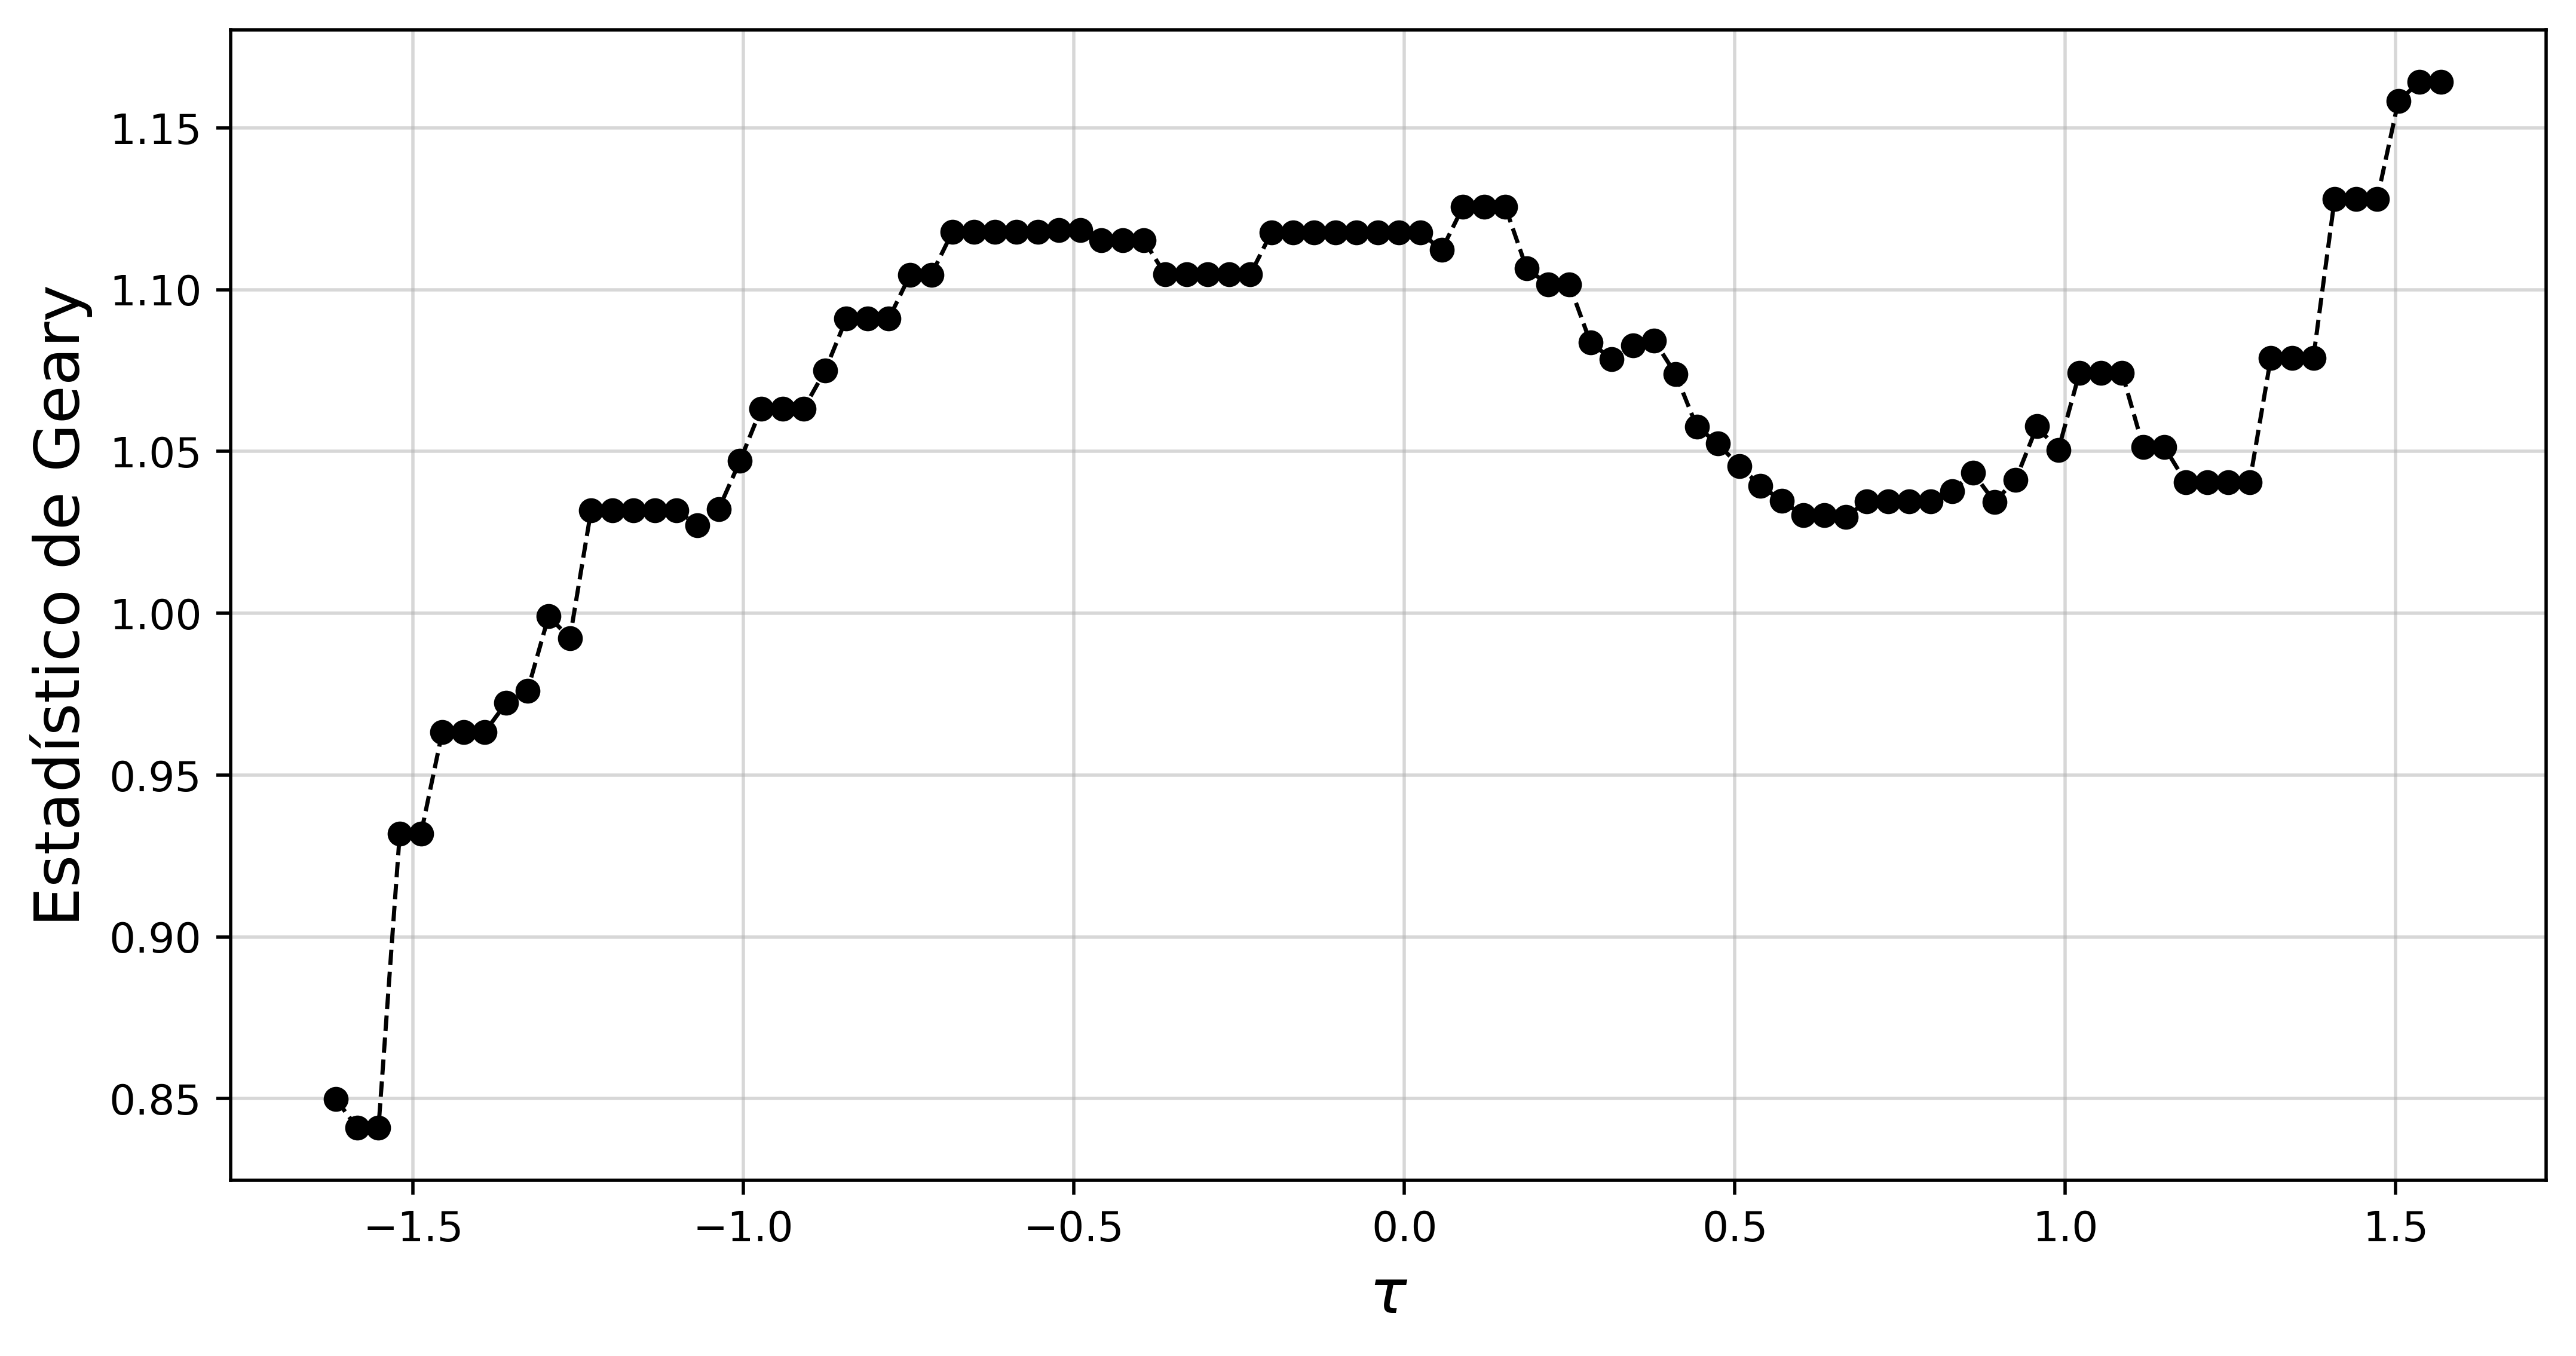

In [13]:
plt.figure(figsize=(10,5), dpi=500)

plt.plot(taus, gearys, 'ko--', ms=5, lw=1)
plt.xlabel(r'$\tau$', size=15)
plt.ylabel('Estadístico de Geary', size=15)
plt.grid(alpha=0.5);

$p$-valores del Test de Hipótesis

In [18]:
# resultados de R
gearys_p_value = np.array([
 3.952019e-01,1.949295e-01,1.949295e-01,4.888002e-01,4.888002e-01,6.165545e-01
,6.165545e-01,6.165545e-01,6.401218e-01,6.577934e-01,9.840755e-01,8.580148e-01
,4.003006e-01,4.003006e-01,4.003006e-01,4.003006e-01,4.003006e-01,4.447850e-01
,3.059069e-01,1.123393e-01,1.624675e-02,1.624675e-02,1.624675e-02,1.366381e-03
,1.187548e-05,1.187548e-05,1.187548e-05,8.932131e-08,8.932131e-08,1.453357e-10
,1.453357e-10,1.453357e-10,1.453357e-10,1.453357e-10,2.979301e-13,2.979301e-13
,5.891795e-16,5.891795e-16,5.891795e-16,3.739895e-15,3.739895e-15,3.739895e-15
,3.739895e-15,3.739895e-15,3.719026e-24,3.719026e-24,3.719026e-24,3.719026e-24
,3.719026e-24,3.719026e-24,3.719026e-24,3.719026e-24,3.731313e-25,2.233991e-35
,2.233991e-35,2.233991e-35,4.317550e-37,2.351987e-37,2.351987e-37,8.867887e-28
,5.850059e-23,1.930575e-18,7.282684e-15,1.905821e-10,5.151041e-05,5.675270e-04
,8.641315e-03,4.371325e-02,9.409735e-02,1.702701e-01,1.702701e-01,2.299157e-01
,1.893850e-01,1.893850e-01,1.893850e-01,1.893850e-01,1.762914e-01,1.434240e-01
,3.327473e-01,2.756254e-01,1.532513e-01,2.786556e-01,1.383998e-01,1.383998e-01
,1.383998e-01,3.456265e-01,3.456265e-01,4.956319e-01,4.956319e-01,4.956319e-01
,4.956319e-01,2.281857e-01,2.281857e-01,2.281857e-01,1.253021e-01,1.253021e-01
,1.253021e-01,1.072836e-01,1.808543e-01,1.808543e-01
])

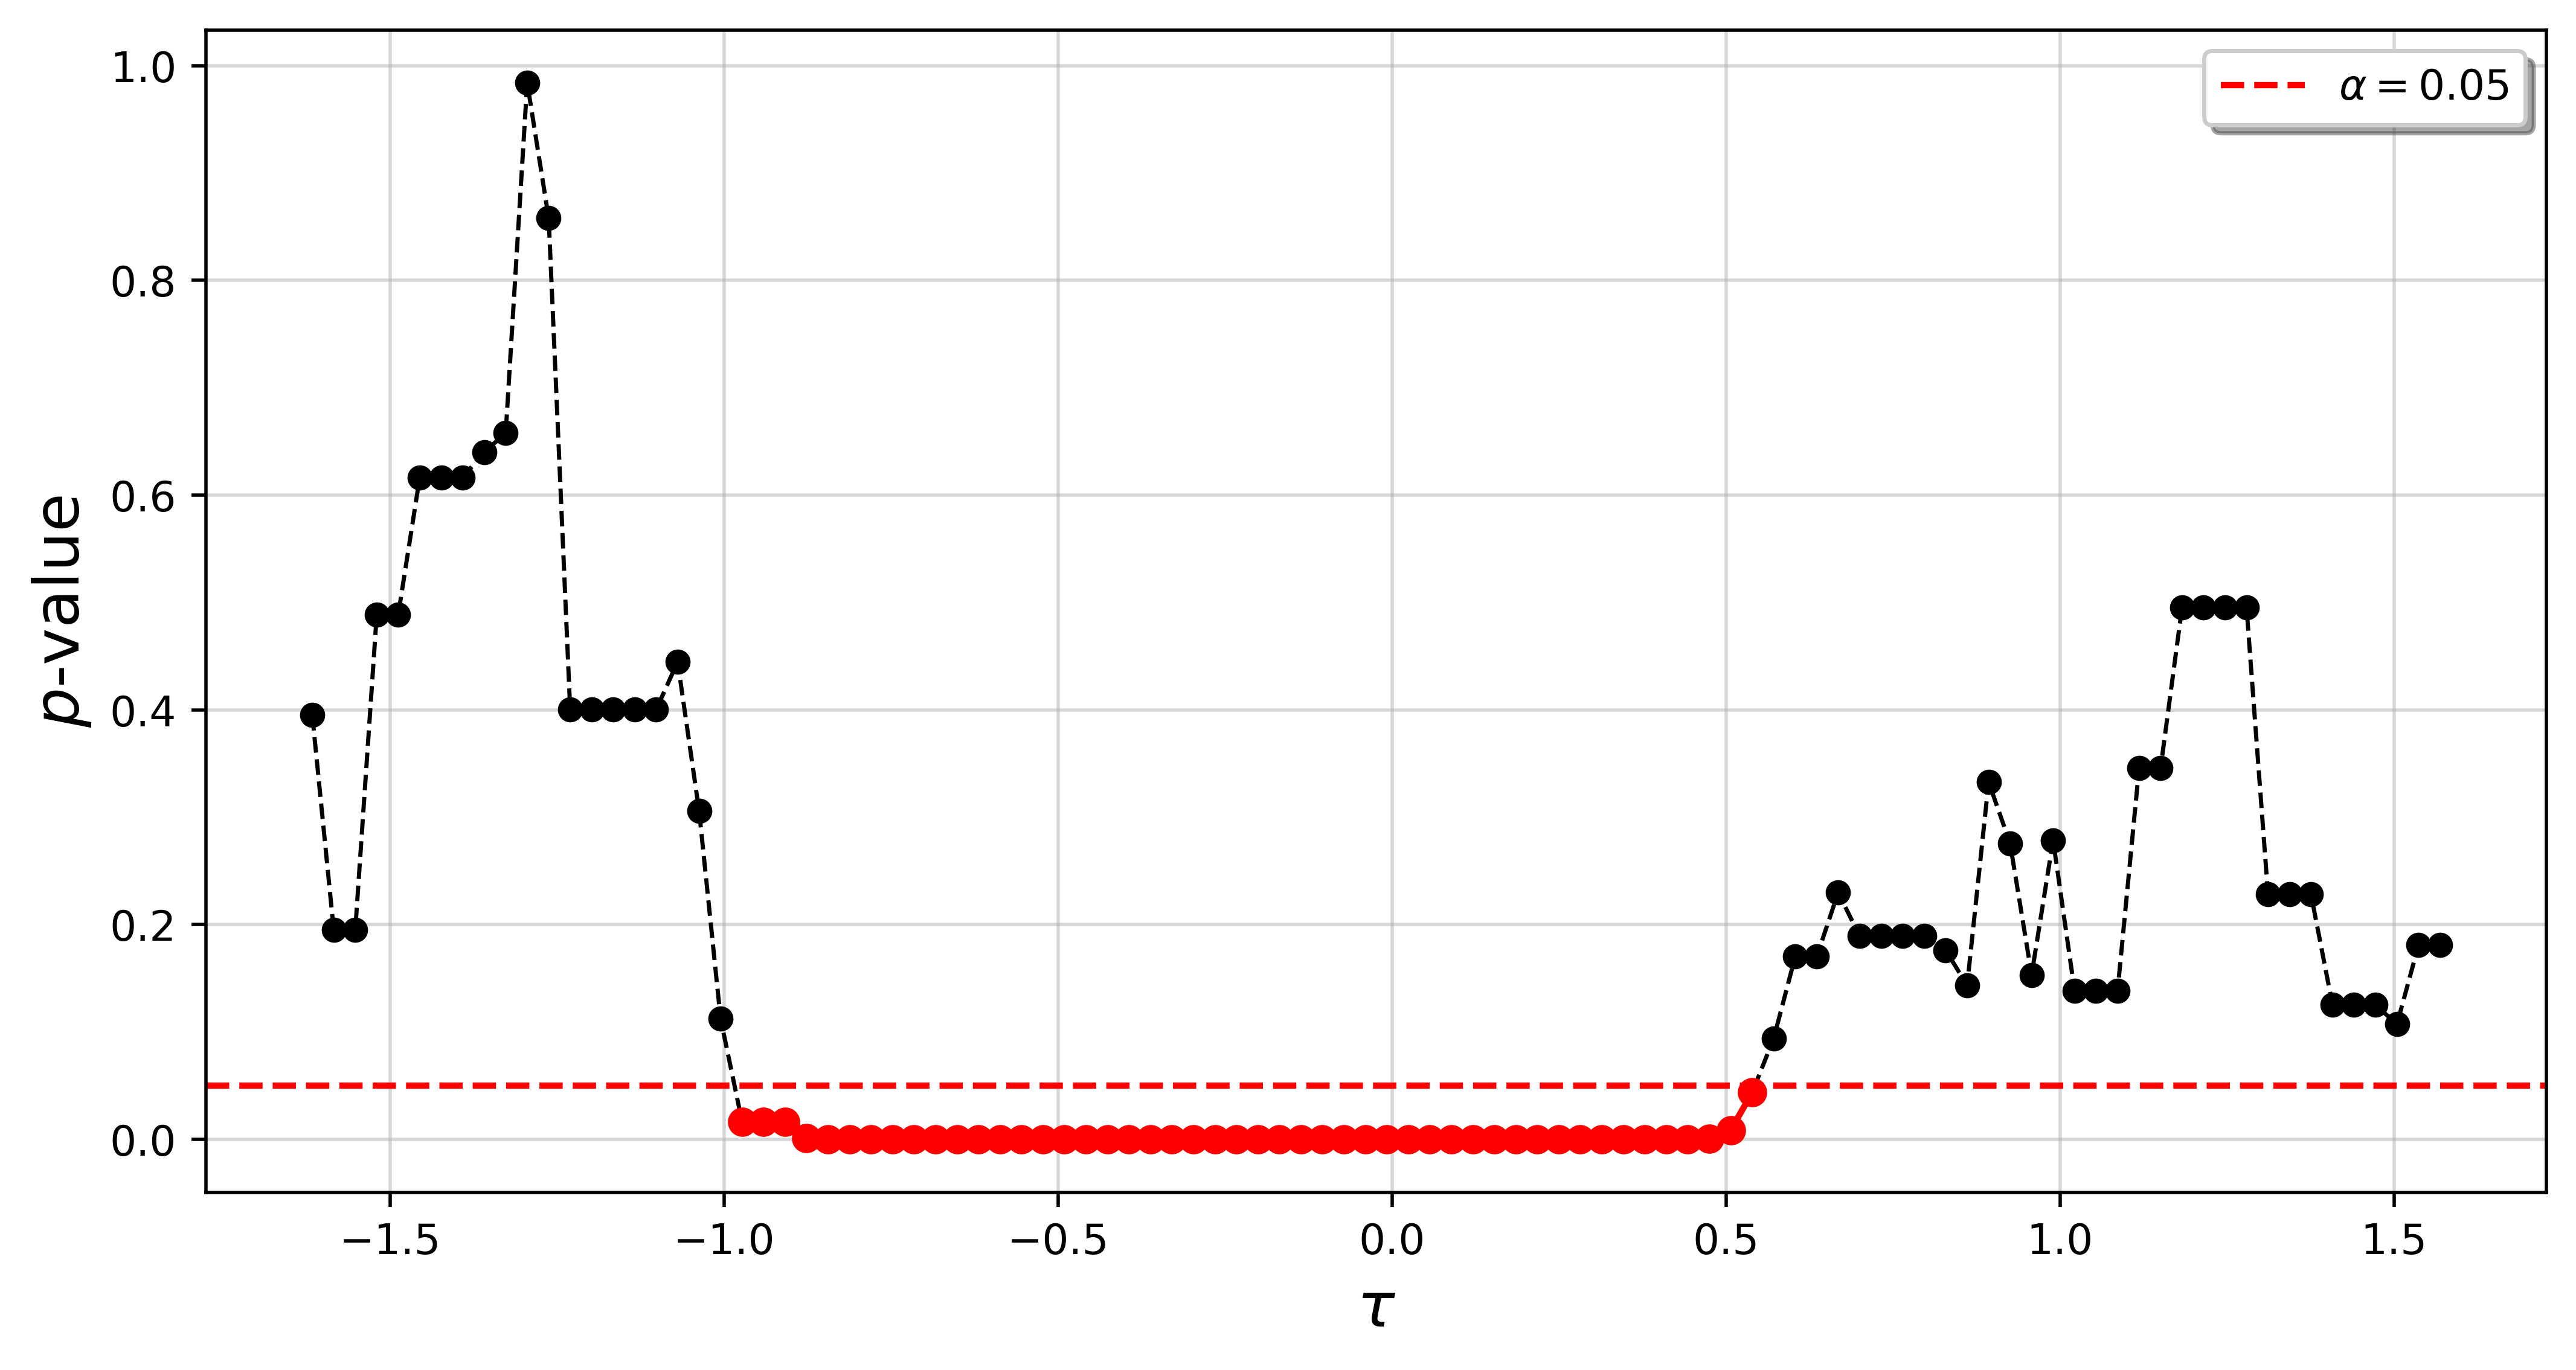

In [19]:
alpha = 0.05

plt.figure(figsize=(10,5), dpi=500)

plt.plot(taus, gearys_p_value, 'ko--', ms=5, lw=1)
plt.plot(taus[gearys_p_value < alpha], gearys_p_value[gearys_p_value < alpha], 'ro-')
plt.xlabel(r'$\tau$', size=15)
plt.ylabel(r'$p$-value', size=15)
plt.axhline(alpha, ls='--', c='r', label=r'$\alpha = 0.05$')
plt.grid(alpha=0.5)
plt.legend(shadow=True);

Región rechazada

In [20]:
taus[gearys_p_value < alpha].min(), taus[gearys_p_value < alpha].max()

(-0.9733136981032595, 0.5389176505266691)